# **Support Ticket Categorization**

## **Business Context**

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to **swiftly and effectively respond to customer input** not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - **done in the modern day using Large Language Models and Generative AI.**

## **Project Objective**

Develop a Generative AI application using a Large Language Model to **automate the classification and processing of support tickets.** The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.**

## **Expected Output**

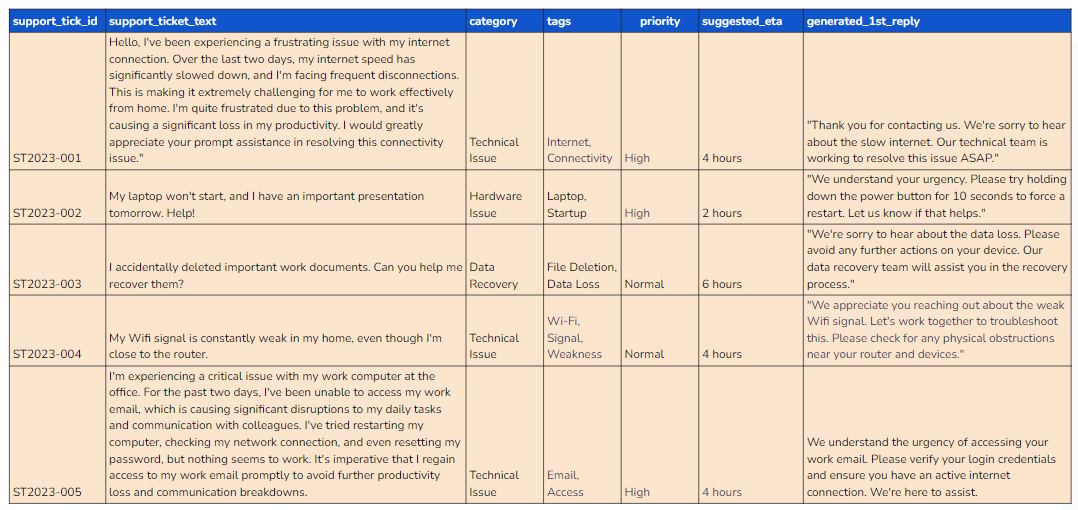

## **Install Necessary Libraries**

In [ ]:
!pip install fastapi

In [ ]:
!pip install kaleido

In [ ]:
!pip install python-multipart

In [ ]:
!pip install uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.8 MB/s eta 0:00:00


In [ ]:
!pip install cohere

In [ ]:
!pip install openai

In [ ]:
!pip install tiktoken

## **Model Loading**

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.28 --force-reinstall --upgrade --no-cache-dir --verbose

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 75.5 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.1 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Running command Getting requirements to build wheel
  Getting requirements to build wheel ... done
  Running command pip subprocess to install backend dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 63.1 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 38.7 MB/s eta 0:00:00
    Creating /tmp/pip-build-env-y__grkwf/normal/local/bin
    changing mo

### Install Hugging Face Hub

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub -q

**Python code to Import the 'hf_hub_download' function from the 'huggingface_hub' library and also import the 'Llama' class from the 'llama_cpp' library**

In [ ]:
# Import the hf_hub_download function from the Hugging Face Hub library
from huggingface_hub import hf_hub_download

# Import the Llama class from the llama_cpp library
from llama_cpp import Llama

In [ ]:
# Define the model name or path as a string
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"

# Define the model basename as a string, indicating it's in the gguf format
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

**Insights:**
* Meta Llama2 presented the GGUF format model files for their Llama2
7B.

* Llama2 is a collection of pretrained and fine-tuned large language models (LLMs) ranging from 7 billion to 70 billion parameters.

* GGUF (Generalized Graph Unification Format) is a new format introduced by the llama.cpp team on August 21st, 2023, as a replacement for the earlier GGML.

* The key benefit of GGUF is that it is a extensible, future-proof format which stores more information about the model as metadata. It also includes significantly improved tokenization code, including for the first time full support for special tokens. This has been shown to improve performance, especially with models that use new special tokens and implement custom prompt templates.

In [ ]:
# Download the model from the Hugging Face Hub using the 'hf_hub_download' function
# by specifying the 'repo_id' and 'filename'
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

llama-2-13b-chat.Q5_K_M.gguf:   0%|          | 0.00/9.23G [00:00<?, ?B/s]

**Insights:**
* hf_hub_download(): This is a function from the Hugging Face Hub library that is being called to perform the download operation. It takes two arguments:

* repo_id: This argument is set to model_name_or_path, which specifies the model to download. The repo_id typically includes information about the model's repository or identifier.

* filename: This argument is set to model_basename, which specifies the desired filename for the downloaded model.

The hf_hub_download() function will connect to the Hugging Face Model Hub, locate the specified model using the provided repo_id, and then download it. The downloaded model will be saved locally with the specified filename. The model_path variable will contain the path to the downloaded model file on your local file system.

### **Initializing an instance of the Llama class with specified parameters**

In [ ]:
# Create an instance of the 'Llama' class with specified parameters
lcpp_llm=Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, considered the amount of VRAM in GPU.
    n_gpu_layers=43, # Change this value based on model and GPU VRAM pool.
    n_ctx=4096, # Context window
)


AVX = 1 | AVX_VNNI = 0 | AVX2 = 1 | AVX512 = 1 | AVX512_VBMI = 0 | AVX512_VNNI = 1 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


**model_path=model_path:** Specifies the path to the model.

**n_threads=2:** This parameter is set to 2, which specifies the number of CPU cores that the Llama instance should use for its operations

* Modern CPUs often have multiple cores, allowing them to perform multiple tasks simultaneously. By specifying the number of threads, you're controlling how many of these cores the Llama instance will utilize.

**n_batch=512:** Sets the batch size (between 1 and n_ctx).It's typically used to specify the batch size for processing data with the model.It should be between 1 and n_ctx (context window), taking into consideration the GPU's VRAM capacity.

* In machine learning, especially with deep learning models, data is often processed in batches rather than one sample at a time. This is because it can lead to more efficient computations, taking advantage of parallel processing capabilities in modern hardware.

In this case, n_batch=512 means that the Llama instance is set to process data in batches of 512.

* Choosing an appropriate batch size is important for balancing computational efficiency with memory constraints.

**n_gpu_layers=43:** Specifies the number of GPU layers (adjust based on GPU VRAM).

**n_ctx=4096:**

* This parameter specifies the context window size, which is a crucial aspect of how a language model processes and generates text.
In the context of language models, a "context window" refers to the range of tokens (words or subwords) that the model considers when generating responses or making predictions.
* When the model generates text, it doesn't consider the entire input sequence but focuses on a limited window of context. This helps the model manage memory and computational resources efficiently.
* A larger context window can provide more context for generating coherent and contextually relevant responses. However, it may also come with increased memory requirements, as the model needs to store and process a larger amount of text.
* The choice of n_ctx should strike a balance between the need for context and the available computational resources (both CPU and GPU memory).

**Insights:**
* max_tokens: This parameter specifies the maximum number of tokens that the
model should generate in response to the prompt. In this case, it's set to 256.
* temperature: This parameter controls the randomness of the generated response. A higher temperature value will result in a more random response, while a lower temperature value will result in a more predictable response. In this case, it's set to 0, which means the response will be deterministic.
* top_p: This parameter controls the diversity of the generated response. A higher value of top_p will result in a more diverse response, while a lower value will result in a less diverse response. In this case, it's set to 0.95, which means the model will try to generate a diverse response.
* repeat_penalty: This parameter controls the penalty for repeating tokens in the generated response. A higher value of repeat_penalty will result in a lower probability of repeating tokens, while a lower value will result in a higher probability of repeating tokens. In this case, it's set to 1.2, which means the model will try to avoid repeating tokens.
* top_k: This parameter controls the maximum number of tokens that will be considered when generating the response. In this case, it's set to 50, which means the model will consider up to 50 tokens when generating the response.
* stop: This parameter is a list of tokens that should be stopped when generating the response. In this case, it's set to ['INST'], which means the model will stop generating tokens when it encounters the token "INST".
* echo: This parameter controls whether the generated response should be echoed back to the user. In this case, it's set to False, which means the generated response will not be echoed back to the user.

## **Define the System Message**

In [ ]:
import re

#import json
import json

In [ ]:
def generate_llama_response(support_ticket_text):

    # System message
    system_message ="""[INST]<<SYS>>You are a technical assistant from an IT department to categories the customer support tickets.
    Extract only the following information from the support ticket text to output JSON representation with the below headers. Ensure the JSON format includes key-value pairs for each detail:
    Desired output:
    {
    "Category": <classify the support ticket into specific categories. The categories are: Technical issue, Hardware issue, Data Recovery. Other responses are not acceptable>
    "Tags": <Add tags which specify the area of issue, that will help further classify the ticket (as an array of strings)>
    "Priority": <classify priority. Priorities are: High, Normal (as string)>
    "Suggested ETA": <suggest estimated resolution time in hours (as string)>
    "Generated 1st Reply": <Reply based on the priority High or Normal. If the priority is high, assure the user that their concern is taken seriously and the team will work on it ASAP. If the priority is normal, acknowledge the issue and offer any immediate assistance or guidance available. Always maintain a polite, helpful and professional tone.>
     }
     <</SYS>>[/INST]
     """

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{system_message}\n{support_ticket_text}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=256,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'], # Dynamic stopping when such token is detected.
        echo=False # do not return the prompt
    )

    # Extract and return the response text

    response_text = response["choices"][0]["text"]
    response_text = re.sub(r'\r?\n', ' ', response_text)

    # Isolate the JSON string from the response text using regular expressions
    match = re.search(r'\{.*?\}', response_text, re.DOTALL)
    if match:
      response_text = match.group()
    else:
      response_text = ""
    return response_text

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

In [ ]:
# Read a CSV file into a DataFrame and store it in the 'data' variable
data=pd.read_csv('/content/drive/MyDrive/Support_ticket_text_data_mid_term.csv')

In [ ]:
# determine the shape of the DataFrame
data.shape

(21, 2)

**Observation:**
Dataset has 21 rows, 2 columns

In [ ]:
data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


## Create a new column in the DataFrame called 'llama_response'

In [ ]:
# Apply a function to each element in the 'support_ticket_text' column of the DataFrame 'data'
# The applied function, in this case, is a lambda function.
# The lambda function takes a single argument 'x', representing each individual 'support_ticket_text' in the column.

# Inside the lambda function:
# - 'generate_llama_response(x)' is called to generate a response based on the 'support_ticket_text'.
# - The result of 'generate_llama_response(x)' is assigned to a new column called 'llama_response' in the DataFrame 'data'.

data['llama_response'] = data['support_ticket_text'].apply(lambda x: generate_llama_response(x))

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


**Insight**: 'llama_response' generated by applying the 'generate_llama_response' function to each 'support_ticket_text' in the DataFrame

In [ ]:
## Check the new_column added
data.head()

,support_tick_id,support_ticket_text,llama_response
0,ST2023-006,My internet connection has significantly slowe...,"{ ""Category"": ""Technical Issue"", ""Tags"": [""Int..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Lapt..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""data ..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{ ""Category"": ""Technical Issue"", ""Tags"": [""Wi-..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{ ""Category"": ""Hardware Issue"", ""Tags"": [""Batt..."


In [ ]:
data['llama_response'][0]

'{ "Category": "Technical Issue", "Tags": ["Internet Connection", "Slow Speed"], "Priority": "High", "Suggested ETA": "2-3 hours", "Generated 1st Reply": "Thank you for reaching out to us. We take your concern seriously, and our team is working on resolving the issue as soon as possible. In the meantime, have you tried restarting your router or modem? If the issue persists, please provide more details about your internet service provider and any error messages you may have encountered." }'

## Prepare the dataset in the desired format

In [ ]:
# Function to parse JSON data and extract key-value pairs
def extract_json_data(json_str):
    try:
        data_dict = json.loads(json_str)
        return data_dict
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

# Apply the function to the 'llama_response' column
data['llama_response_parsed'] = data['llama_response'].apply(extract_json_data)

In [ ]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed
0,ST2023-006,My internet connection has significantly slowe...,"{ ""Category"": ""Technical Issue"", ""Tags"": [""Int...","{'Category': 'Technical Issue', 'Tags': ['Inte..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Lapt...","{'Category': 'Hardware Issue', 'Tags': ['Lapto..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""data ...","{'Category': 'Data Recovery', 'Tags': ['data l..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{ ""Category"": ""Technical Issue"", ""Tags"": [""Wi-...","{'Category': 'Technical Issue', 'Tags': ['Wi-F..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{ ""Category"": ""Hardware Issue"", ""Tags"": [""Batt...","{'Category': 'Hardware Issue', 'Tags': ['Batte..."
5,ST2023-011,I'm locked out of my online banking account an...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""Onlin...","{'Category': 'Data Recovery', 'Tags': ['Online..."
6,ST2023-012,"My computer's performance is sluggish, severel...","{ ""Category"": ""Technical issue"", ""Tags"": [""per...","{'Category': 'Technical issue', 'Tags': ['perf..."
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Blue...","{'Category': 'Hardware Issue', 'Tags': ['Blue ..."
8,ST2023-014,My external hard drive isn't being recognized ...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""Exter...","{'Category': 'Data Recovery', 'Tags': ['Extern..."
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Gami...","{'Category': 'Hardware Issue', 'Tags': ['Gamin..."


In [ ]:
data['llama_response_parsed'][0]

{'Category': 'Technical Issue',
 'Tags': ['Internet Connection', 'Slow Speed'],
 'Priority': 'High',
 'Suggested ETA': '2-3 hours',
 'Generated 1st Reply': 'Thank you for reaching out to us. We take your concern seriously, and our team is working on resolving the issue as soon as possible. In the meantime, have you tried restarting your router or modem? If the issue persists, please provide more details about your internet service provider and any error messages you may have encountered.'}

In [ ]:
# Concatenate the original DataFrame 'data' with a new DataFrame created by normalizing JSON data.

# The 'data['llama_response_parsed']' column is assumed to contain JSON data that needs to be flattened and normalized.

# 'pd.json_normalize' is a pandas function used to normalize semi-structured JSON data into a flat DataFrame.
# In this case, it's applied to the 'llama_response_parsed' column, which presumably contains JSON data.

# The result of 'pd.json_normalize' is a DataFrame where the JSON data is flattened and each element becomes a separate column.

# The 'axis=1' parameter specifies that the concatenation should be done horizontally, i.e., the new columns from normalization
# will be added as new columns in the 'data' DataFrame.

# After this operation, the 'data' DataFrame will contain the original columns along with the additional columns
# generated by normalizing the JSON data from the 'llama_response_parsed


data = pd.concat([data, pd.json_normalize(data['llama_response_parsed'])], axis=1)

In [ ]:
data

,support_tick_id,support_ticket_text,llama_response,llama_response_parsed,Category,Tags,Priority,Suggested ETA,Generated 1st Reply
0,ST2023-006,My internet connection has significantly slowe...,"{ ""Category"": ""Technical Issue"", ""Tags"": [""Int...","{'Category': 'Technical Issue', 'Tags': ['Inte...",Technical Issue,"[Internet Connection, Slow Speed]",High,2-3 hours,Thank you for reaching out to us. We take your...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Lapt...","{'Category': 'Hardware Issue', 'Tags': ['Lapto...",Hardware Issue,[Laptop startup issues],High,2-3 hours,"We understand the urgency of your situation, a..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""data ...","{'Category': 'Data Recovery', 'Tags': ['data l...",Data Recovery,"[data loss, documents]",High,2-3 hours,"We understand the urgency of your situation, a..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{ ""Category"": ""Technical Issue"", ""Tags"": [""Wi-...","{'Category': 'Technical Issue', 'Tags': ['Wi-F...",Technical Issue,[Wi-Fi Signal Strength],Normal,24 hours,Thank you for reaching out to us. We apologize...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{ ""Category"": ""Hardware Issue"", ""Tags"": [""Batt...","{'Category': 'Hardware Issue', 'Tags': ['Batte...",Hardware Issue,[Battery Life],Normal,2-3 business days,Thank you for reaching out to us. We're here t...
5,ST2023-011,I'm locked out of my online banking account an...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""Onlin...","{'Category': 'Data Recovery', 'Tags': ['Online...",Data Recovery,"[Online Banking, Password Reset]",High,2-3 hours,Thank you for reaching out to us. We understan...
6,ST2023-012,"My computer's performance is sluggish, severel...","{ ""Category"": ""Technical issue"", ""Tags"": [""per...","{'Category': 'Technical issue', 'Tags': ['perf...",Technical issue,[performance],High,2-3 hours,Thank you for reaching out to us. We take your...
7,ST2023-013,I'm experiencing a recurring blue screen error...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Blue...","{'Category': 'Hardware Issue', 'Tags': ['Blue ...",Hardware Issue,"[Blue Screen Error, PC Crashes]",High,2-3 hours,Thank you for reaching out to our support team...
8,ST2023-014,My external hard drive isn't being recognized ...,"{ ""Category"": ""Data Recovery"", ""Tags"": [""Exter...","{'Category': 'Data Recovery', 'Tags': ['Extern...",Data Recovery,"[External Hard Drive, File Recovery]",High,2-3 hours,Thank you for reaching out to us. We understan...
9,ST2023-015,The graphics card in my gaming laptop seems to...,"{ ""Category"": ""Hardware Issue"", ""Tags"": [""Gami...","{'Category': 'Hardware Issue', 'Tags': ['Gamin...",Hardware Issue,"[Gaming Laptop, Graphics Card]",High,2-3 hours,Thank you for reaching out to us. We take your...


In [ ]:
# Drop specific columns which are not needed from the DataFrame 'data'
df=data.drop(['llama_response', 'llama_response_parsed'], axis=1)
# Keep the columns which are mentioned in the sample output

In [ ]:
df.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority,Suggested ETA,Generated 1st Reply
0,ST2023-006,My internet connection has significantly slowe...,Technical Issue,"[Internet Connection, Slow Speed]",High,2-3 hours,Thank you for reaching out to us. We take your...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware Issue,[Laptop startup issues],High,2-3 hours,"We understand the urgency of your situation, a..."
2,ST2023-008,I've accidentally deleted essential work docum...,Data Recovery,"[data loss, documents]",High,2-3 hours,"We understand the urgency of your situation, a..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Technical Issue,[Wi-Fi Signal Strength],Normal,24 hours,Thank you for reaching out to us. We apologize...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware Issue,[Battery Life],Normal,2-3 business days,Thank you for reaching out to us. We're here t...


## **Observations and insights**

The exercise entails collecting high-quality data through Generative AI by interacting with the customers and helping them identify the specific context. The generated data offers insights about customer issues, inquiries, and behavioral patterns for different service levels.


With this understanding, Generative AI helps support teams offer personalized recommendations and solutions that cater to a customer's unique needs and preferences. This way, the technology reduces the possibility of confusion and frustration for customers, who are less likely to create support tickets.


This exercise has exceptional contextual understanding and issue-resolving capabilities, recognizes the need for human touch. By gathering relevant customer information and delivering it to human agents, ensures that every ticket contains the essential details required for rapid and seamless problem-solving.

The Llama 2 model can produce high-quality outputs that would be considered on par with the quality of OpenAI's GPT-3.5. The prompt examples provided should give an idea of the creative ability of LLMs to adapt their outputs to the business requirements on hand. In addition to just the system prompt and query text, tweaking the parameters of the prompt, such as Temperature, Top K, Frequency Penalty etc, is another way to modify the LLM's outputs according to customer needs.


## **Recommendations**
The proposed model is essential and effective for a business. The data library containing all the issues relating to raised tickets will generate a wide range of data for businesses to take proactive actions. These data also drive the business to understand the customers' complaints and define a better service and solution matrix for the customer going forward. In a competitive environment, customer service is a key determining factor for customers to remain loyal. The model helps to build a better customer service environment for businesses.


Take, for instance, a customer who’s had an issue with a laptop or personal computer. The AI system will address their immediate concern, consider purchase history, issues faced, and more that are relevant for each individual customer’s journey. This not only improves the customer experience but also builds trust and loyalty. Such solution will help the business to understand the pattern of the issue faced by the customer and thus indulge in focusing on the product quality, warranty and free servicing benefits.
